In [153]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 20
np.set_printoptions(precision = 4, suppress = True)

# US Wildfire data 

In [154]:
file = '/Users/stevenkraamwinkel/Desktop/Data wrangling/Project/wildfire.csv'
wildfire_data = pd.read_csv(file,index_col=0, parse_dates=True)

# SOURCE_URL: https://www.kaggle.com/rtatman/188-million-us-wildfires

/Users/stevenkraamwinkel/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [155]:
display(wildfire_data)
#Containing wildfire data from years: 1992-2015

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,511,Plumas National Forest,...,A,40.037,-121.006,5.000,USFS,CA,63.000,63.000,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.933,-120.404,5.000,USFS,CA,61.000,61.000,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.984,-120.736,13.000,STATE OR PRIVATE,CA,17.000,17.000,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559,-119.913,5.000,USFS,CA,3.000,3.000,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,503,Eldorado National Forest,...,A,38.559,-119.933,5.000,USFS,CA,3.000,3.000,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880460,1880461,300348363,2015CAIRS29019636,NONFED,ST-CACDF,ST/C&L,USCASHU,Shasta-Trinity Unit,CASHU,Shasta-Trinity Unit,...,A,40.482,-122.389,13.000,STATE OR PRIVATE,CA,NaN,nan,NaN,b'\x00\x01\xad\x10\x00\x00P\xb8\x1e\x85\xeb\x9...
1880461,1880462,300348373,2015CAIRS29217935,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.618,-120.939,12.000,MUNICIPAL/LOCAL,CA,NaN,nan,NaN,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880462,1880463,300348375,2015CAIRS28364460,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,A,37.618,-120.939,12.000,MUNICIPAL/LOCAL,CA,NaN,nan,NaN,b'\x00\x01\xad\x10\x00\x00\x00\x80\xbe\x88\x11...
1880463,1880464,300348377,2015CAIRS29218079,NONFED,ST-CACDF,ST/C&L,USCATCU,Tuolumne-Calaveras Unit,CATCU,Tuolumne-Calaveras Unit,...,B,37.672,-120.898,12.000,MUNICIPAL/LOCAL,CA,NaN,nan,NaN,b'\x00\x01\xad\x10\x00\x00x\xba_\xaa~9^\xc0\xb...


In [156]:
### DATA EXPLANATION ###

### Calculating the number of fires each year 

In [157]:
fires_per_year = wildfire_data.groupby('FIRE_YEAR')['OBJECTID'].nunique()

In [158]:
display(fires_per_year)

FIRE_YEAR
1992    67975
1993    61989
1994    75955
1995    71472
1996    75574
        ...  
2011    90552
2012    72769
2013    64780
2014    67753
2015    74491
Name: OBJECTID, Length: 24, dtype: int64

### Calculating the mean size of a fire for each year

In [159]:
#FIRE_SIZE = Estimate of acres within the final perimeter of the fire
wildfire_data['FIRE_SIZE']

0         0.100
1         0.250
2         0.100
3         0.100
4         0.100
           ... 
1880460   0.010
1880461   0.200
1880462   0.100
1880463   2.000
1880464   0.100
Name: FIRE_SIZE, Length: 1880465, dtype: float64

In [160]:
#The average size of a fire in acres over the years: 1992-2015
average_size_all_fires = wildfire_data['FIRE_SIZE'].mean()
display(average_size_all_fires)

74.520158339107

In [161]:
#The average size of a fire in acres for each year
average_fire_size = wildfire_data.groupby('FIRE_YEAR')['FIRE_SIZE'].mean()

In [162]:
display(average_fire_size)

FIRE_YEAR
1992    32.364
1993    35.356
1994    54.199
1995    28.677
1996    79.461
         ...  
2011   106.277
2012   129.724
2013    69.350
2014    54.219
2015   137.175
Name: FIRE_SIZE, Length: 24, dtype: float64

# Greenhouse Gases emissions

In [163]:
greenhouse_data = '/Users/stevenkraamwinkel/Desktop/Data wrangling/Project/climate_change.csv'

# SOURCE_URL: https://www.kaggle.com/econdata/climate-change

In [164]:
### DATA EXPLANATION ###

# Global data of the concentration of the the five most common greenhouse gases in the atmosphere, and 
# other important important factors contributing to climate change. 

# CO2: Carbon Dioxide (CO2), produced by organisms, volcanoes, geysers, oxidation processes, but also by the \
# combustion of wood and fossil fuels. 
# CH4: Methane, and is the main component of natural gas, which is used as a fuel for cooking, house heating,  \
# and is also used in various industrial chemical processes. It is also transported in its liquid form known as LNG \
# (liquefied natural gas), under temperatures between -182 and -162 degrees Celsius. 
# N2O: Nitrous Oxide, also known as laughing gas. Used primarily as a medicine for various medical treatments, but \
# is also used as a fuel to increase engine power. 
# CFC.11: Trichlorofluoromethane. A chemical liquid that boils to gas around room temperature. Was applied in many \
# refrigerators and air conditioning systems. Because of its huge negative impact on the ozon layer, most countries
# agreed to stop producing it since 2010. 
# CFC.12, full name: Dichlorodifluoromethane. A chemical gas, mostly used as a refigirant, and aerosol spray. For 
# its negative effects comparable to CFC.11, the substance is banned from developed countries since 2010. 

# MEI = multivariate El Nino Southern Oscillation index (MEI), a weather affect that affects global temperatures
# TSI = the total solar irradiance, the amount of energy from the sun of the earth's atmosphere. Because of \
# sunspots and other solar activity, the amount of energy given off by the sun varies over time. 
# Aerosols: small particles in the atmosphere that absorb or reflect solar radiation. Main factors that determine the \
# amount are desert winds, volcano eruptions, but also pollution from industry and transportation. 
# Temp: the difference in degrees Celsius between the average global temperature in that period and the reference \
# value. A positive value implies an increase in global temperature. 


# DATA MEASUREMENT:
# CO2, CH4, and N2O in ppmv (parts per million by volume)
# CFC.11 and CFC.12 in ppbv (parts per billion by volume)
# TSI in W/m2 (rate of sun energy deposited per unit area in the atmosphere)
# Aerosols: At their rate of thickness in the atmosphere
# Temp: the difference in degrees Celsius between the average global temperature in that period and the reference \
# value. A positive value implies an increase in global temperature. 

# For our research the 


In [165]:
greenhouse_df = pd.read_csv(greenhouse_data, index_col=0, parse_dates=True, sep=';')
greenhouse_df


,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,,,,,,,,,,
1983-01-01,5,2.556,345.960,1638.590,303.677,191.324,350.113,13.661.024,0.086,0.109
1983-01-01,6,2.167,345.520,1633.710,303.746,192.057,351.848,13.661.208,0.079,0.118
1983-01-01,7,1.741,344.150,1633.220,303.795,192.818,353.725,1.366.285,0.073,0.137
1983-01-01,8,1.130,342.250,1631.350,303.839,193.602,355.633,13.664.202,0.067,0.176
1983-01-01,9,0.428,340.170,1648.400,303.901,194.392,357.465,13.662.335,0.062,0.149
...,...,...,...,...,...,...,...,...,...,...
2008-01-01,8,-0.266,384.150,1779.880,321.405,244.200,535.072,1.365.657,0.004,0.407
2008-01-01,9,-0.643,383.090,1795.080,321.529,244.083,535.048,13.656.647,0.004,0.378
2008-01-01,10,-0.780,382.990,1814.180,321.796,244.080,534.927,13.656.759,0.005,0.440


In [166]:
year_averages = greenhouse_df.groupby('Year').mean()
pd.options.display.float_format = '{:.3f}'.format
#year_averages = greenhouse_df.groupby('Year').mean().reset_index()

In [167]:
display(year_averages)

,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,Aerosols,Temp
Year,,,,,,,,,
1983-01-01,8.500,0.959,342.869,1645.200,303.880,193.987,356.361,0.066,0.137
1984-01-01,6.500,-0.151,344.580,1656.119,304.702,201.167,367.794,0.030,-0.019
1985-01-01,6.500,-0.398,346.042,1668.887,305.240,212.858,383.307,0.013,-0.037
1986-01-01,6.500,0.449,347.384,1682.556,306.450,223.766,402.760,0.014,0.034
1987-01-01,6.500,1.649,349.161,1693.730,306.055,234.715,423.273,0.010,0.178
...,...,...,...,...,...,...,...,...,...
2004-01-01,6.500,0.411,377.491,1790.385,318.293,253.843,542.412,0.002,0.444
2005-01-01,6.500,0.319,379.800,1789.898,319.048,251.583,541.513,0.003,0.474
2006-01-01,6.500,0.303,381.904,1785.757,319.994,249.467,540.199,0.004,0.425


In [168]:
#DROP COLUMNS
adj_df = year_averages.drop(['Month', 'MEI','Aerosols','Temp',], 
               axis = 1) 

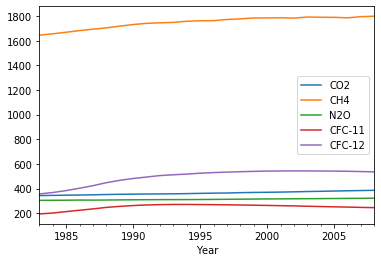

In [169]:
adj_df.plot()

## Modifying greenhouse dataframe for merge 

In [170]:
#adj_df

In [171]:
adj_dfyears = adj_df['1992-01-01':'2008-01-01'] 

display(adj_dfyears)

,CO2,CH4,N2O,CFC-11,CFC-12
Year,,,,,
1992-01-01,356.382,1745.423,309.937,269.454,505.308
1993-01-01,357.068,1748.597,310.200,270.743,511.871
1994-01-01,358.823,1758.261,310.336,270.907,517.298
1995-01-01,360.796,1761.713,311.014,269.946,524.521
1996-01-01,362.588,1762.900,311.760,269.141,529.513
1997-01-01,363.705,1772.511,312.722,267.902,533.402
1998-01-01,366.652,1777.672,313.641,266.233,536.619
1999-01-01,368.326,1784.867,314.620,264.728,539.399
2000-01-01,369.525,1784.763,315.643,262.831,541.606


In [172]:
adj_dfyears = adj_df['1992-01-01':'2008-01-01'] 
greenhouse_newdf = adj_dfyears.reset_index()
greenhouse_newdf['Year'] = greenhouse_newdf['Year'].astype(str)
greenhouse_newdf['Year'].replace({'1992-01-01':'1992', '1993-01-01':'1993', '1994-01-01':'1994'
                               ,'1995-01-01':'1995', '1996-01-01':'1996', '1997-01-01':'1997'
                               ,'1998-01-01':'1998', '1999-01-01':'1999', '2000-01-01':'2000'
                               ,'2001-01-01':'2001', '2002-01-01':'2002', '2003-01-01':'2003'
                               ,'2004-01-01':'2004', '2005-01-01':'2005', '2006-01-01':'2006'
                               ,'2007-01-01':'2007', '2008-01-01':'2008'}, inplace=True)

greenhouse_newdf['Year'] = pd.to_numeric(greenhouse_newdf['Year'], errors='coerce')
greenhouse_newdf.dtypes

Year        int64
CO2       float64
CH4       float64
N2O       float64
CFC-11    float64
CFC-12    float64
dtype: object

In [173]:
greenhouse_newdf

,Year,CO2,CH4,N2O,CFC-11,CFC-12
0,1992,356.382,1745.423,309.937,269.454,505.308
1,1993,357.068,1748.597,310.200,270.743,511.871
2,1994,358.823,1758.261,310.336,270.907,517.298
3,1995,360.796,1761.713,311.014,269.946,524.521
4,1996,362.588,1762.900,311.760,269.141,529.513
5,1997,363.705,1772.511,312.722,267.902,533.402
6,1998,366.652,1777.672,313.641,266.233,536.619
7,1999,368.326,1784.867,314.620,264.728,539.399
8,2000,369.525,1784.763,315.643,262.831,541.606
9,2001,371.130,1786.424,316.316,260.954,542.466


In [174]:
greenhouse_newdf.dtypes

Year        int64
CO2       float64
CH4       float64
N2O       float64
CFC-11    float64
CFC-12    float64
dtype: object

### New dataframe number of fires per year

In [176]:
df = pd.DataFrame(fires_per_year).reset_index()

nr_fires_df = df.rename(columns={'OBJECTID':'NUMBER_OF_FIRES', 'FIRE_YEAR':'Year'})
nr_fires_df = nr_fires_df.loc[0:16]
display(nr_fires_df)


,Year,NUMBER_OF_FIRES
0,1992,67975
1,1993,61989
2,1994,75955
3,1995,71472
4,1996,75574
5,1997,61450
6,1998,68370
7,1999,89363
8,2000,96416
9,2001,86587


### New dataframe of the fire size 

In [177]:
dataf = pd.DataFrame(average_fire_size).reset_index()
fire_size_df = dataf.rename(columns={'FIRE_YEAR': 'Year', 'OBJECTID':'FIRE_SIZE'})
fire_size_df = fire_size_df.loc[0:16]
display(fire_size_df)

fire_size_df.dtypes

,Year,FIRE_SIZE
0,1992,32.364
1,1993,35.356
2,1994,54.199
3,1995,28.677
4,1996,79.461
5,1997,52.313
6,1998,29.415
7,1999,68.039
8,2000,79.235
9,2001,43.010


Year           int64
FIRE_SIZE    float64
dtype: object

## Merging dataframes to final form

In [179]:
merged_df1 = pd.merge(greenhouse_newdf, fire_size_df, on='Year')
merged_df1

,Year,CO2,CH4,N2O,CFC-11,CFC-12,FIRE_SIZE
0,1992,356.382,1745.423,309.937,269.454,505.308,32.364
1,1993,357.068,1748.597,310.200,270.743,511.871,35.356
2,1994,358.823,1758.261,310.336,270.907,517.298,54.199
3,1995,360.796,1761.713,311.014,269.946,524.521,28.677
4,1996,362.588,1762.900,311.760,269.141,529.513,79.461
5,1997,363.705,1772.511,312.722,267.902,533.402,52.313
6,1998,366.652,1777.672,313.641,266.233,536.619,29.415
7,1999,368.326,1784.867,314.620,264.728,539.399,68.039
8,2000,369.525,1784.763,315.643,262.831,541.606,79.235
9,2001,371.130,1786.424,316.316,260.954,542.466,43.010


In [180]:
full_merge = pd.merge(merged_df1, nr_fires_df, on='Year')
display(full_merge)

,Year,CO2,CH4,N2O,CFC-11,CFC-12,FIRE_SIZE,NUMBER_OF_FIRES
0,1992,356.382,1745.423,309.937,269.454,505.308,32.364,67975
1,1993,357.068,1748.597,310.200,270.743,511.871,35.356,61989
2,1994,358.823,1758.261,310.336,270.907,517.298,54.199,75955
3,1995,360.796,1761.713,311.014,269.946,524.521,28.677,71472
4,1996,362.588,1762.900,311.760,269.141,529.513,79.461,75574
5,1997,363.705,1772.511,312.722,267.902,533.402,52.313,61450
6,1998,366.652,1777.672,313.641,266.233,536.619,29.415,68370
7,1999,368.326,1784.867,314.620,264.728,539.399,68.039,89363
8,2000,369.525,1784.763,315.643,262.831,541.606,79.235,96416
9,2001,371.130,1786.424,316.316,260.954,542.466,43.010,86587


In [181]:
column_1 = full_merge['CO2']
column_2 = full_merge['NUMBER_OF_FIRES']
correlation = column_1.corr(column_2)
print(correlation)

0.6115857764686137


### Correlation matrix 

In [182]:
all_correlations = full_merge.corr()
display(all_correlations)

,Year,CO2,CH4,N2O,CFC-11,CFC-12,FIRE_SIZE,NUMBER_OF_FIRES
Year,1.000,0.998,0.935,0.997,-0.974,0.782,0.694,0.606
CO2,0.998,1.000,0.922,0.996,-0.982,0.754,0.688,0.612
CH4,0.935,0.922,1.000,0.928,-0.846,0.910,0.618,0.526
N2O,0.997,0.996,0.928,1.000,-0.979,0.766,0.682,0.615
CFC-11,-0.974,-0.982,-0.846,-0.979,1.000,-0.626,-0.663,-0.591
CFC-12,0.782,0.754,0.910,0.766,-0.626,1.000,0.607,0.460
FIRE_SIZE,0.694,0.688,0.618,0.682,-0.663,0.607,1.000,0.462
NUMBER_OF_FIRES,0.606,0.612,0.526,0.615,-0.591,0.460,0.462,1.000


### Heatmap

In [183]:
import seaborn as sns

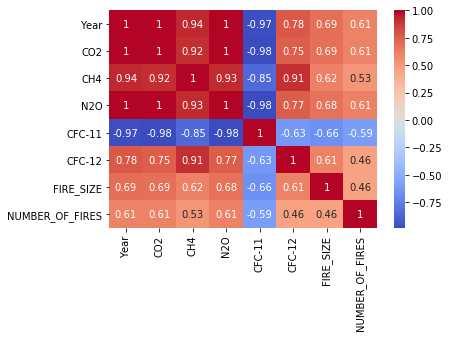

In [184]:
sns.heatmap(all_correlations, annot = True,
fmt='.2g',cmap= 'coolwarm')

## Correlation scatterplot of CO2 against the average fire size

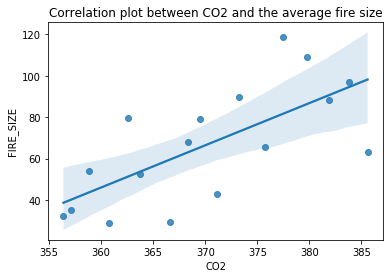

In [185]:
scatter_1 = sns.regplot(x='CO2', y='FIRE_SIZE', data=full_merge).set_title('Correlation plot between CO2 and the average fire size')


## Correlation plots of six variables from merged dataframe against the average fire size

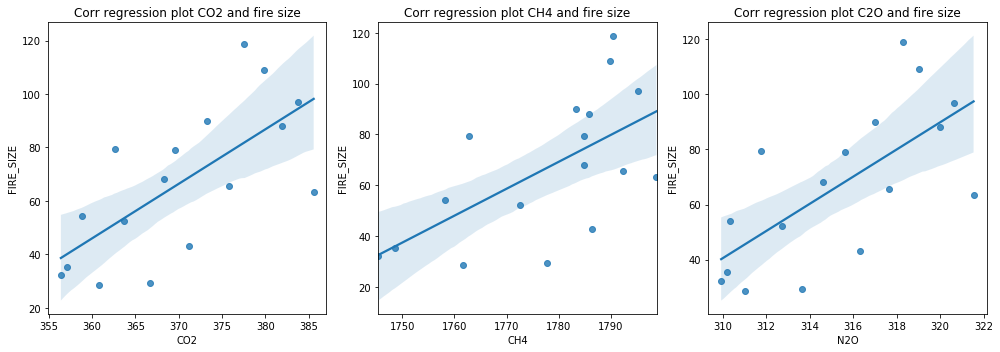

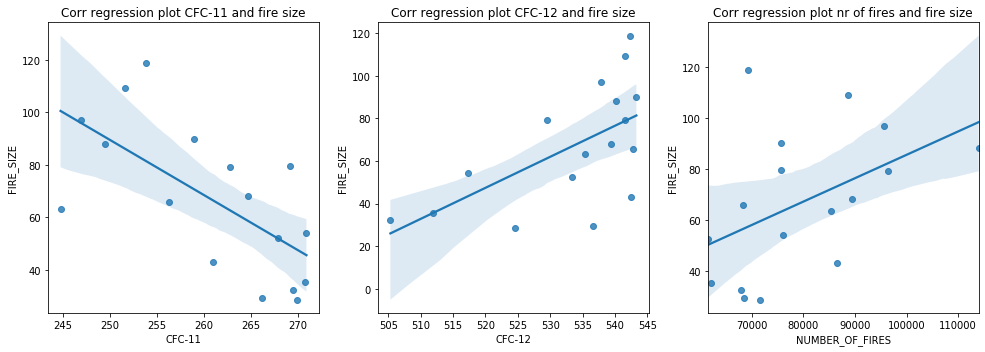

In [192]:
fig, axs = plt.subplots(ncols=3, figsize=(14,5))
sns.regplot(x='CO2', y='FIRE_SIZE', data=full_merge, ax=axs[0]).set_title('Corr regression plot CO2 and fire size')
sns.regplot(x='CH4', y='FIRE_SIZE', data=full_merge, ax=axs[1]).set_title('Corr regression plot CH4 and fire size')
sns.regplot(x='N2O', y='FIRE_SIZE', data=full_merge, ax=axs[2]).set_title('Corr regression plot C2O and fire size')
fig.tight_layout()

fig, axs = plt.subplots(ncols=3, figsize=(14,5))
sns.regplot(x='CFC-11', y='FIRE_SIZE', data=full_merge, ax=axs[0]).set_title('Corr regression plot CFC-11 and fire size')
sns.regplot(x='CFC-12', y='FIRE_SIZE', data=full_merge, ax=axs[1]).set_title('Corr regression plot CFC-12 and fire size')
sns.regplot(x='NUMBER_OF_FIRES', y='FIRE_SIZE', data=full_merge, ax=axs[2]).set_title('Corr regression plot nr of fires and fire size')
fig.tight_layout()


## Correlation plots of six variables from merged dataframe against the number of fires per year

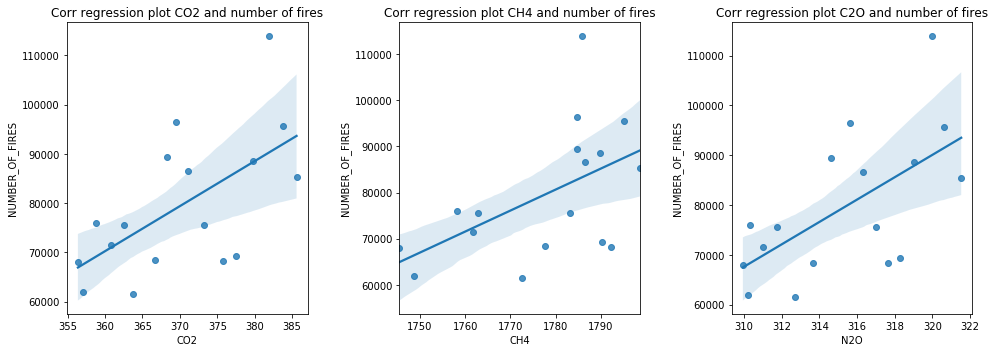

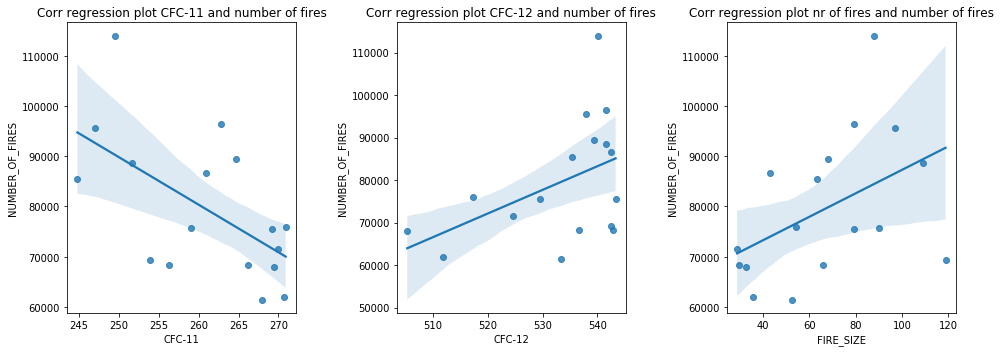

In [196]:
fig, axs = plt.subplots(ncols=3, figsize=(14,5))
sns.regplot(x='CO2', y='NUMBER_OF_FIRES', data=full_merge, ax=axs[0]).set_title('Corr regression plot CO2 and number of fires')
sns.regplot(x='CH4', y='NUMBER_OF_FIRES', data=full_merge, ax=axs[1]).set_title('Corr regression plot CH4 and number of fires')
sns.regplot(x='N2O', y='NUMBER_OF_FIRES', data=full_merge, ax=axs[2]).set_title('Corr regression plot C2O and number of fires')
fig.tight_layout()

fig, axs = plt.subplots(ncols=3, figsize=(14,5))
sns.regplot(x='CFC-11', y='NUMBER_OF_FIRES', data=full_merge, ax=axs[0]).set_title('Corr regression plot CFC-11 and number of fires')
sns.regplot(x='CFC-12', y='NUMBER_OF_FIRES', data=full_merge, ax=axs[1]).set_title('Corr regression plot CFC-12 and number of fires')
sns.regplot(x='FIRE_SIZE', y='NUMBER_OF_FIRES', data=full_merge, ax=axs[2]).set_title('Corr regression plot nr of fires and number of fires')
fig.tight_layout()


### Correlation plots of all variables from merged dataframe 


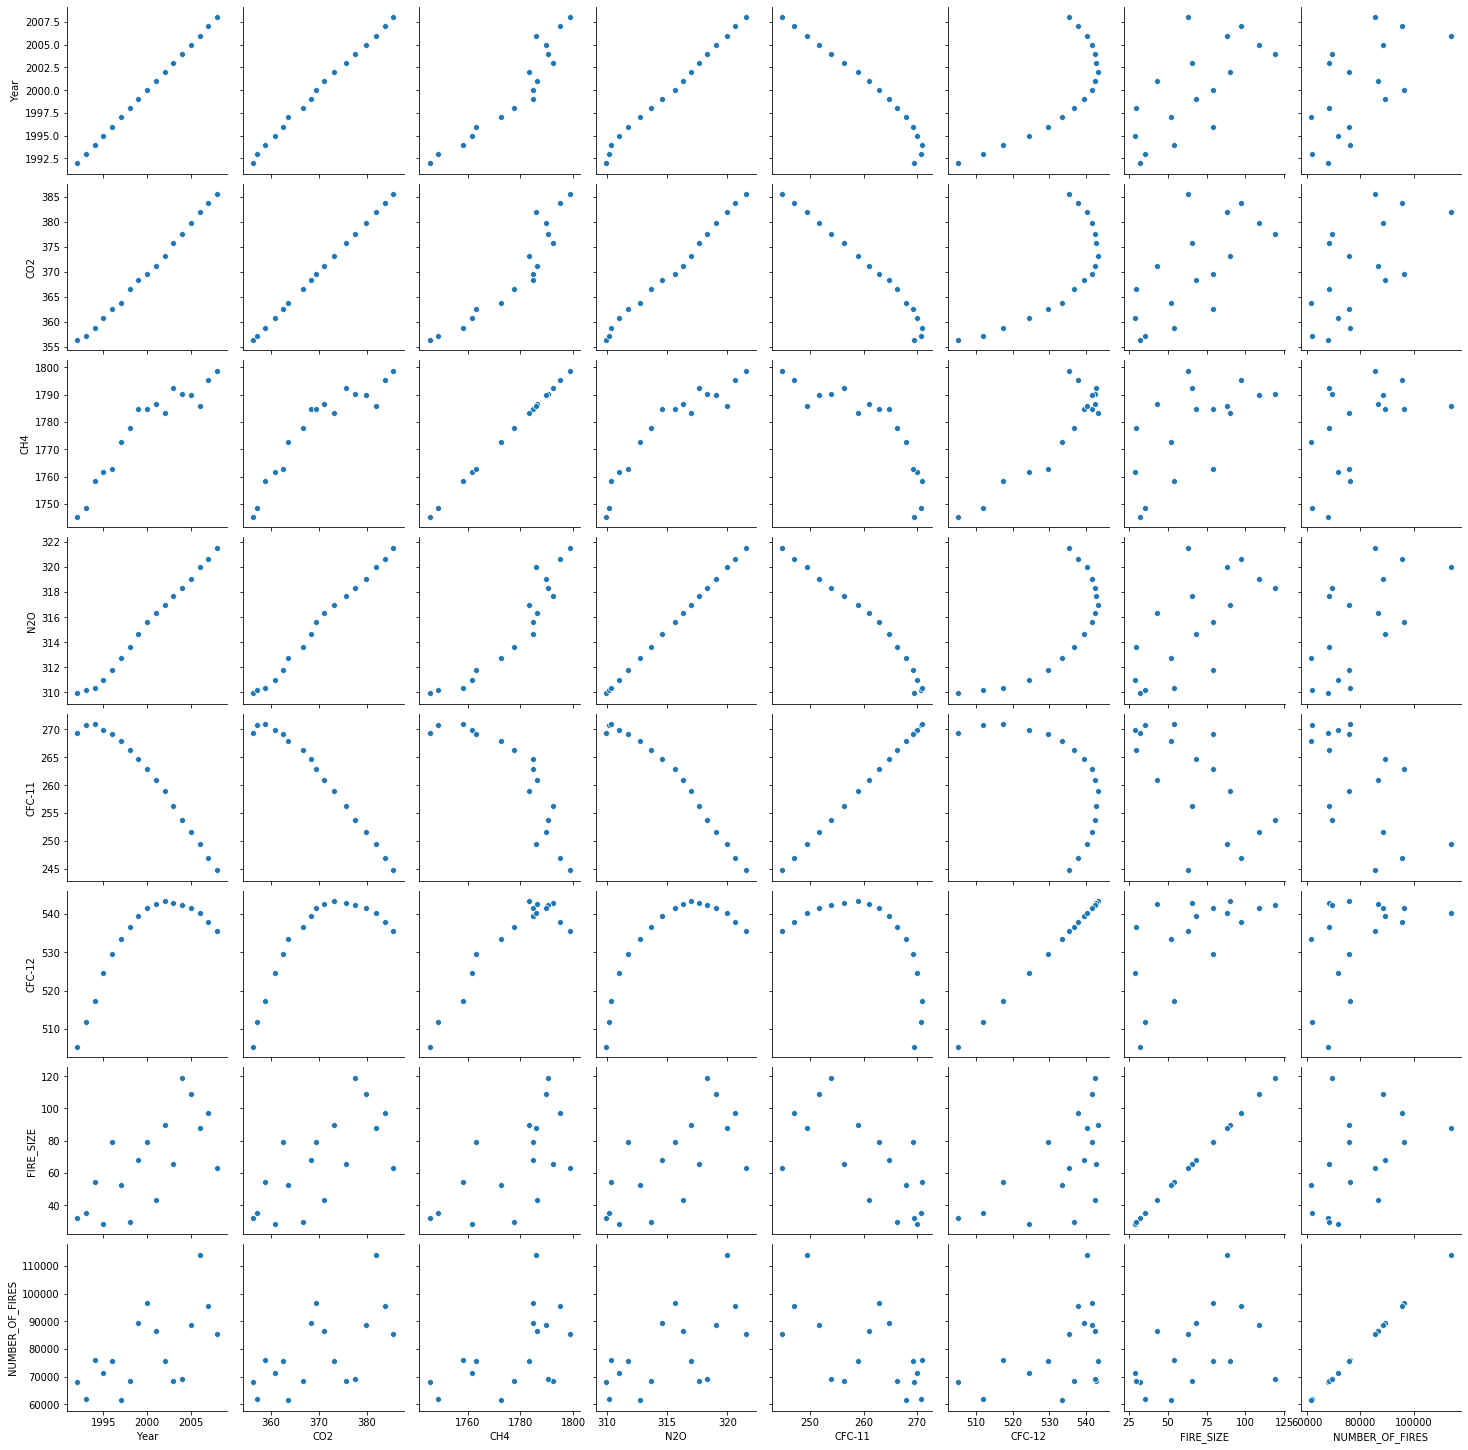

In [195]:

#SCATTERPLOT IN SEABORN BETWEEN ALL VARIABLES
g = sns.PairGrid(full_merge)
g.map(sns.scatterplot)

END OF NOTEBOOK